In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [67]:
l3T = pd.read_csv('data/l3T.csv')
l3T.head()

l3_forest = l3T.copy()
l3_forest

,host,clientIp,timestamp_min,timestamp_max,time_active,count
0,www.f81C.de,104.215.18.178,48295,286809,238514,4
1,www.f81C.de,110.193.215.48,189303,228127,38824,2
2,www.f81C.de,110.251.240.42,51088,51088,0,1
3,www.f81C.de,115.147.226.201,34296,104285,69989,6
4,www.f81C.de,115.239.140.6,225932,225932,0,1
...,...,...,...,...,...,...
800,www.44LC.de,91.17.14.243,190826,285847,95021,6
801,www.44LC.de,94.8.150.15,179197,179197,0,1
802,www.44LC.de,95.249.153.156,154050,299993,145943,3
803,www.44LC.de,95.83.162.166,68890,126486,57596,2


In [36]:
features = l3_forest[['timestamp_min', 'timestamp_max', 'time_active', 'count']]
features = features.fillna(0)

features_scaled = scaler.fit_transform(features)

clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(features_scaled)

IsolationForest(contamination=0.1, random_state=42)

In [39]:
l3_forest['anomaly'] = clf.predict(features_scaled)  # -1: Anomalie, 1: Normal
l3_forest['anomaly_score'] = clf.decision_function(features_scaled)

# Ergebnisse anzeigen
l3_forest

,host,clientIp,timestamp_min,timestamp_max,time_active,count,anomaly,anomaly_score
0,www.f81C.de,104.215.18.178,48295,286809,238514,4,1,0.093002
1,www.f81C.de,110.193.215.48,189303,228127,38824,2,1,0.055464
2,www.f81C.de,110.251.240.42,51088,51088,0,1,1,0.033778
3,www.f81C.de,115.147.226.201,34296,104285,69989,6,-1,-0.058396
4,www.f81C.de,115.239.140.6,225932,225932,0,1,1,0.017611
...,...,...,...,...,...,...,...,...
800,www.44LC.de,91.17.14.243,190826,285847,95021,6,-1,-0.047818
801,www.44LC.de,94.8.150.15,179197,179197,0,1,1,0.042473
802,www.44LC.de,95.249.153.156,154050,299993,145943,3,1,0.025516
803,www.44LC.de,95.83.162.166,68890,126486,57596,2,1,0.060259


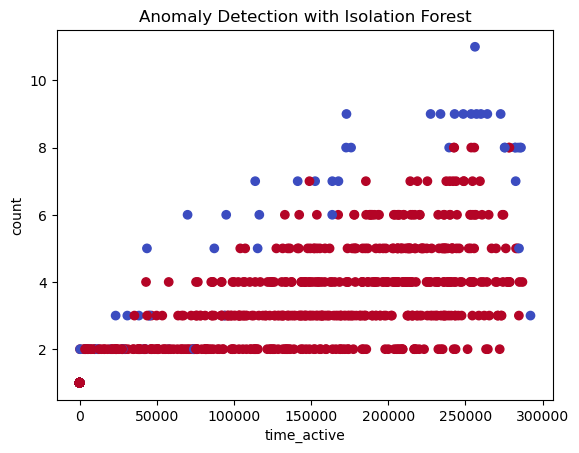

In [61]:
plt.scatter(features['time_active'], features['count'], c=l3_forest['anomaly'], cmap='coolwarm')
plt.xlabel('time_active')
plt.ylabel('count')
plt.title('Anomaly Detection with Isolation Forest')
plt.show()

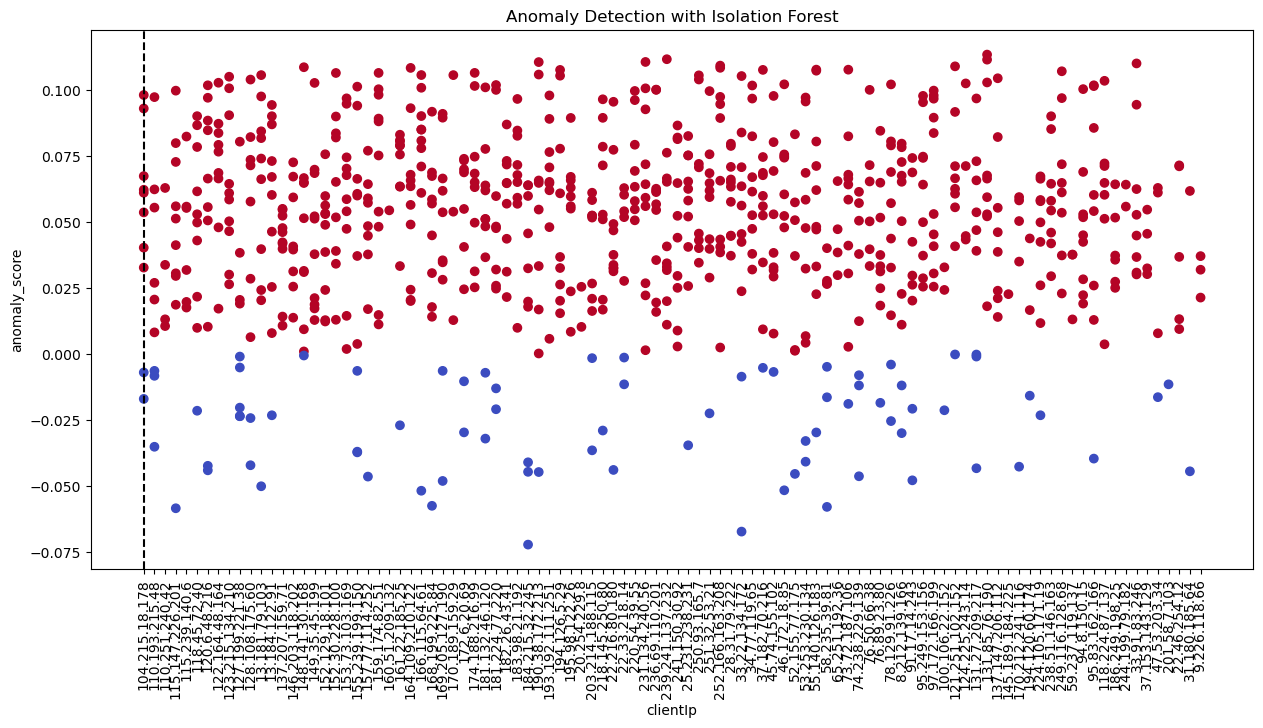

In [44]:
plt.figure(figsize=(15,7))

plt.scatter(l3_forest['clientIp'], l3_forest['anomaly_score'], c=l3_forest['anomaly'], cmap='coolwarm')

plt.xlabel('clientIp')
plt.ylabel('anomaly_score')
plt.title('Anomaly Detection with Isolation Forest')

plt.xticks(rotation=90)
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

In [62]:
client_ratings = pd.DataFrame({
    'clientId': [],
    'anomaly_median': [],
    'mean_anomaly_score': []
})

for client in l3_forest['clientIp'].unique():
    l3_forest_filtered = l3_forest[l3_forest['clientIp'] == client]
    line = {
        'clientId': client,
        'anomaly_median': l3_forest_filtered['anomaly'].median(),
        'mean_anomaly_score': l3_forest_filtered['anomaly_score'].mean()
    }
    client_ratings.loc[len(client_ratings)] = line
    
client_ratings
    

,clientId,anomaly_median,mean_anomaly_score
0,104.215.18.178,1.0,0.048456
1,110.193.215.48,1.0,0.024585
2,110.251.240.42,1.0,0.030112
3,115.147.226.201,1.0,0.042138
4,115.239.140.6,1.0,0.043792
...,...,...,...
95,47.53.203.34,1.0,0.028907
96,201.58.7.103,-1.0,-0.011463
97,22.46.254.12,1.0,0.040410
98,31.180.185.64,0.0,0.008684


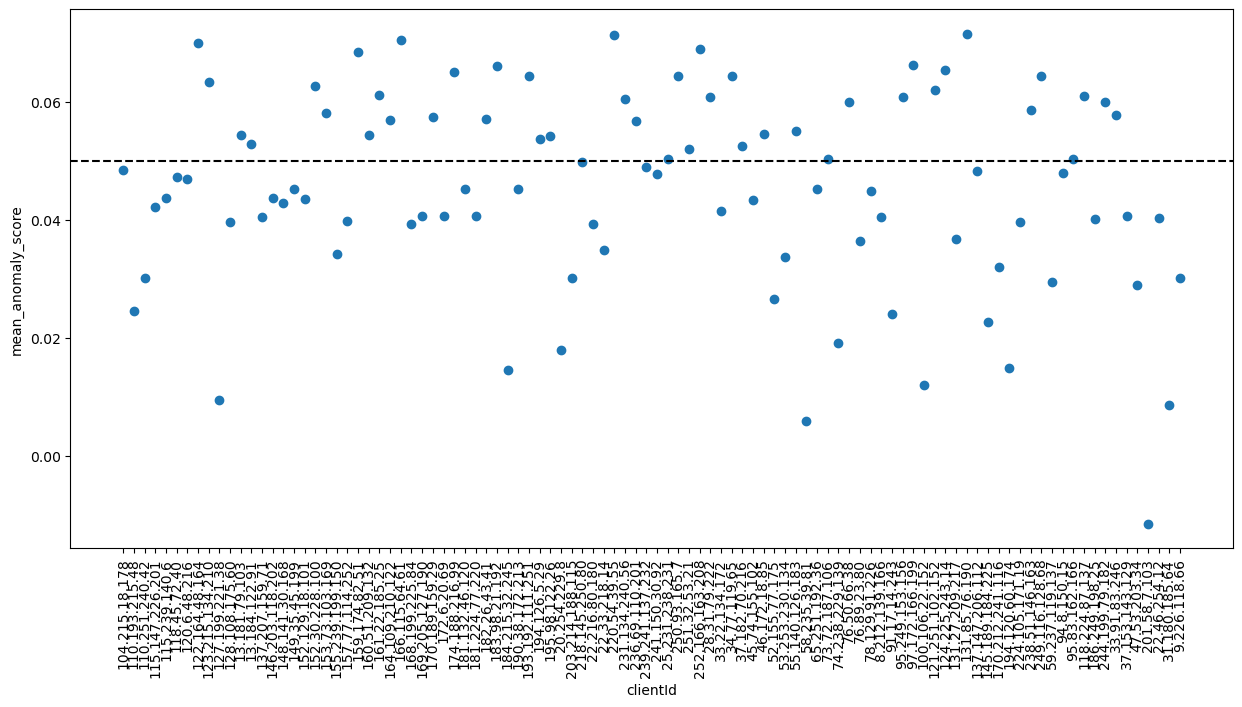

In [65]:
plt.figure(figsize=(15,7))

plt.scatter(client_ratings['clientId'], client_ratings['mean_anomaly_score'])

plt.xlabel('clientId')
plt.ylabel('mean_anomaly_score')
plt.xticks(rotation=90)
plt.axhline(0.05, color='black', linestyle='--')
plt.show()